In [ ]:
# References
# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69808&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# https://serokell.io/blog/introduction-to-convolutional-neural-networks
# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69808&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
# https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/
# arima model
# ML pipeline/ Ml Ops


In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# Loading Data

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 6452 files belonging to 4 classes.


In [5]:
len(data)

202

In [6]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [7]:
batch = data_iterator.next()
batch

(array([[[[136.0708    , 116.0708    , 109.0708    ],
          [127.98096   , 105.82471   ,  97.54346   ],
          [131.07373   , 106.07373   ,  99.07373   ],
          ...,
          [113.06738   ,  91.06738   ,  80.06738   ],
          [117.74658   ,  96.59033   ,  83.02783   ],
          [100.87695   ,  81.87695   ,  64.87695   ]],
 
         [[131.57812   , 111.578125  , 102.578125  ],
          [132.45117   , 110.29492   , 102.01367   ],
          [134.1709    , 110.1709    , 100.1709    ],
          ...,
          [104.16992   ,  82.16992   ,  71.16992   ],
          [111.13721   ,  89.98096   ,  76.493164  ],
          [107.640625  ,  88.640625  ,  73.640625  ]],
 
         [[132.6875    , 110.6875    ,  99.6875    ],
          [134.20215   , 112.20215   , 101.20215   ],
          [135.04688   , 111.046875  , 101.046875  ],
          ...,
          [111.47119   ,  89.47119   ,  78.47119   ],
          [105.57666   ,  84.42041   ,  71.29639   ],
          [104.7334    ,  85.73

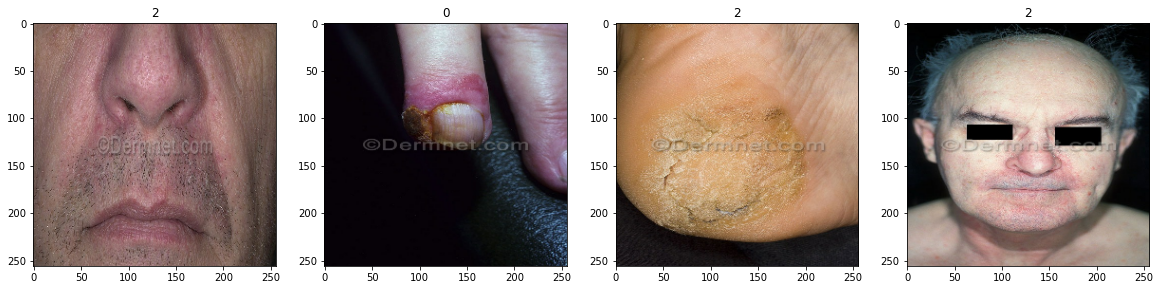

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale data

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.03295803, 0.01335018, 0.02903646],
          [0.03295803, 0.01335018, 0.02903646],
          [0.03295803, 0.01335018, 0.02903646],
          ...,
          [0.01960784, 0.01176471, 0.02352941],
          [0.01960784, 0.01176471, 0.02352941],
          [0.01960784, 0.01176471, 0.02352941]],
 
         [[0.03529412, 0.01568628, 0.03137255],
          [0.03529412, 0.01568628, 0.03137255],
          [0.03529412, 0.01568628, 0.03137255],
          ...,
          [0.01960784, 0.01176471, 0.02352941],
          [0.01960784, 0.01176471, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941]],
 
         [[0.03529412, 0.01568628, 0.03137255],
          [0.03529412, 0.01568628, 0.03137255],
          [0.03529412, 0.01568628, 0.03137255],
          ...,
          [0.01960784, 0.01176471, 0.02352941],
          [0.0185049 , 0.01286765, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941]],
 
         ...,
 
         [[0.06250024, 0.04672971, 0.04263964],
          [0.05595

# Split data

In [21]:
len(data)

202

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train_size

141

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.regularizers import l2

In [26]:
model = Sequential()

In [27]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(64, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Dropout(0.6))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(4, activation='softmax'))

# =======================================================================
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()


# model.add(MaxPooling2D())

# model.add(Flatten())

# model.add(Dense(254, activation='relu'))
# model.add(Dense(4, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 516128)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               66064512  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                      

In [170]:
# model.summary()

In [28]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
141/141 [==============================] - 334s 2s/step - loss: 3.0953 - accuracy: 0.2779 - val_loss: 1.3832 - val_accuracy: 0.2656
Epoch 2/15
141/141 [==============================] - 315s 2s/step - loss: 1.3888 - accuracy: 0.2726 - val_loss: 1.3845 - val_accuracy: 0.2648
Epoch 3/15
141/141 [==============================] - 351s 2s/step - loss: 1.3838 - accuracy: 0.2655 - val_loss: 1.3850 - val_accuracy: 0.2523
Epoch 4/15
141/141 [==============================] - 319s 2s/step - loss: 1.3825 - accuracy: 0.2759 - val_loss: 1.3835 - val_accuracy: 0.2578
Epoch 5/15
141/141 [==============================] - 312s 2s/step - loss: 1.3825 - accuracy: 0.2775 - val_loss: 1.3850 - val_accuracy: 0.2586
Epoch 6/15
141/141 [==============================] - 308s 2s/step - loss: 1.3838 - accuracy: 0.2744 - val_loss: 1.3852 - val_accuracy: 0.2555
Epoch 7/15
141/141 [==============================] - 306s 2s/step - loss: 1.3830 - accuracy: 0.2790 - val_loss: 1.3841 - val_accuracy: 0.2578

# Plot Performance

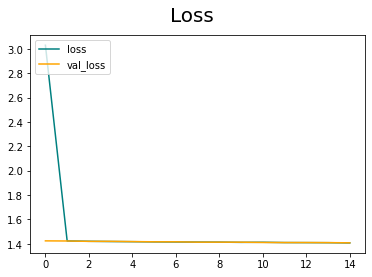

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

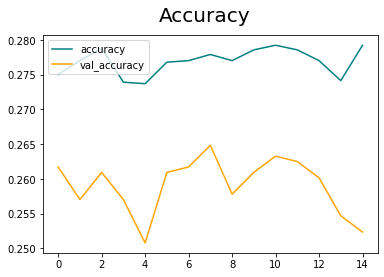

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()